## 1. Formulate the problem

In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

### Goal: From the 10 classes predict which one is in the image

In [3]:
n=5000
train_images = train_images[:n]
train_labels = train_labels[:n]

## Explore the data

Familiarize yourself with the CIFAR10 dataset. To start, consider the following questions:
1. What is the dimension of a single data point? What do you think the dimensions mean?
2. What is the range of values that your input data takes?
3. What is the shape of the labels, and how many labels do we have?
4. (Optional) We are going to build a new architecture from scratch to get you
familiar with the convolutional neural network basics.
But in the real world you wouldn't do that.
So the challenge is: Browse the web for (more) existing architectures or pre-trained models that are likely to work
well on this type of data. Try to understand why they work well for this type of data.


In [6]:
# What is the dimension of a single data point? What do you think the dimensions mean?
train_images.shape

(5000, 32, 32, 3)

In [7]:
# What is the range of values that your input data takes?
train_images.min(), train_images.max()

(0, 255)

In [9]:
# What is the shape of the labels, and how many labels do we have?
train_labels.shape

(5000, 1)

In [10]:
train_labels.min(), train_labels.max()

(0, 9)

In [11]:
import numpy as np
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## 3. Prepare data

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

BREAK until 14:40

## 4. Choose a pretrained model or build from scratch

In [14]:
dim = train_images.shape[1] * train_images.shape[2] * train_images.shape[3]
dim

3072

In [15]:
# Let's say we have 100 hidden units, how many paramaters? We have 3072 inputs

In [16]:
100 * dim

307200

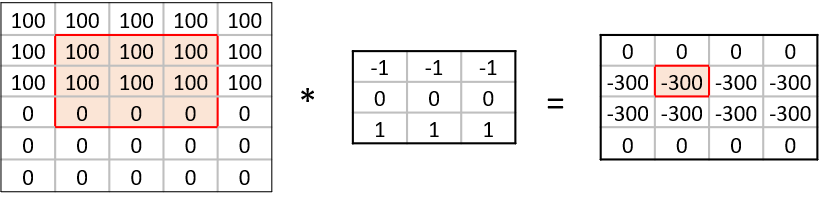
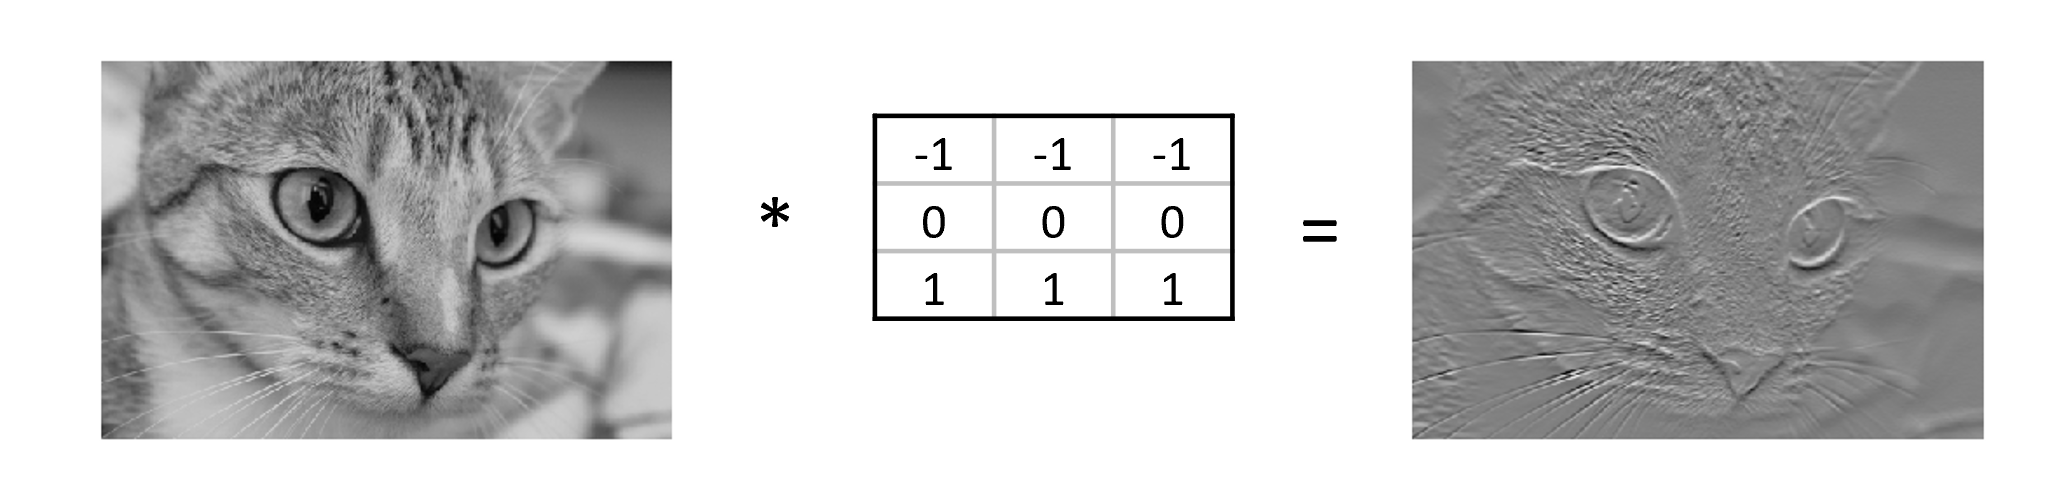


## Exercise: understanding convolutional neural networks
### 1. Border pixels

What, do you think, happens to the border pixels when applying a convolution?


### 2. Number of model parameters

Suppose we apply a convolutional layer with 100 kernels of size 3 * 3 * 3 (the last dimension applies to the rgb channels) to our images of 32 * 32 * 3 pixels. How many parameters do we have? Assume, for simplicity, that the kernels do not use bias terms. Compare this to the answer of the previous exercise


### 3. Convolutional Neural Network
So let us look at a network with a few convolutional layers. We need to finish with a Dense layer to connect the output cells of the convolutional layer to the outputs for our classes.
```python
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()
```
Inspect the network above:
* What do you think is the function of the `Flatten` layer?
* Which layer has the most parameters? Do you find this intuitive?
* (optional) Pick a model from https://paperswithcode.com/sota/image-classification-on-cifar-10 . Try to understand how it works.}

In [18]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer (same as maxpool)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1800)        

## 5. Choose a loss function and optimizer

In [19]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


2023-05-24 15:45:20.468020: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


157/157 [==============================] - 2s 13ms/step - loss: 2.0531 - accuracy: 0.2282 - val_loss: 1.8320 - val_accuracy: 0.3546
Epoch 2/10
157/157 [==============================] - 2s 12ms/step - loss: 1.6969 - accuracy: 0.3820 - val_loss: 1.5896 - val_accuracy: 0.4216
Epoch 3/10
157/157 [==============================] - 2s 12ms/step - loss: 1.5070 - accuracy: 0.4582 - val_loss: 1.5081 - val_accuracy: 0.4528
Epoch 4/10
157/157 [==============================] - 2s 12ms/step - loss: 1.4166 - accuracy: 0.4896 - val_loss: 1.4491 - val_accuracy: 0.4782
Epoch 5/10
157/157 [==============================] - 2s 12ms/step - loss: 1.2979 - accuracy: 0.5358 - val_loss: 1.4475 - val_accuracy: 0.4825
Epoch 6/10
157/157 [==============================] - 2s 12ms/step - loss: 1.2305 - accuracy: 0.5644 - val_loss: 1.4287 - val_accuracy: 0.4871
Epoch 7/10
157/157 [==============================] - 2s 13ms/step - loss: 1.1467 - accuracy: 0.6018 - val_loss: 1.4231 - val_accuracy: 0.5008
Epoch 8/10

<AxesSubplot:>

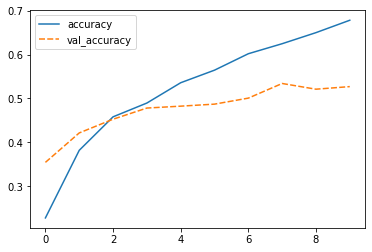

In [21]:
import seaborn as sns
import pandas as pd
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<AxesSubplot:>

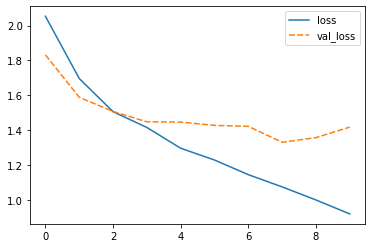

In [22]:
sns.lineplot(data=history_df[['loss', 'val_loss']])


## Network depth

What, do you think, will be the effect of adding a convolutional layer to your model? Will this model have more or fewer parameters?
Try it out. Create a `model` that has an additional `Conv2d` layer with 50 filters after the last MaxPooling2D layer. Train it for 20 epochs and plot the results.

**HINT**:
The model definition that we used previously needs to be adjusted as follows:
~~~
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x)
# Add your extra layer here
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x)
outputs = keras.layers.Dense(10)(x)
~~~

## Why and when to use convolutional neural networks

1. Would it make sense to train a convolutional neural network (CNN) on the penguins dataset and why?
2. Would it make sense to train a CNN on the weather dataset and why?
3. (Optional) Can you think of a different machine learning task that would benefit from a
CNN architecture?

In [23]:
inputs = keras.Input(shape=train_images.shape[1:])
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(inputs)
x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.MaxPooling2D((2, 2))(x) # a new maxpooling layer (same as maxpool)
x = keras.layers.Conv2D(50, (3, 3), activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(50, activation='relu')(x) # a new Dense layer
outputs = keras.layers.Dense(10)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="cifar_model_small")

model.summary()

Model: "cifar_model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 50)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 50)        22550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 50)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 50)    

## 5. Choose a loss function and optimizer

In [24]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
157/157 [==============================] - 3s 15ms/step - loss: 2.1191 - accuracy: 0.2012 - val_loss: 1.8257 - val_accuracy: 0.3295
Epoch 2/10
157/157 [==============================] - 2s 15ms/step - loss: 1.7446 - accuracy: 0.3668 - val_loss: 1.6704 - val_accuracy: 0.4043
Epoch 3/10
157/157 [==============================] - 2s 15ms/step - loss: 1.5601 - accuracy: 0.4358 - val_loss: 1.5507 - val_accuracy: 0.4285
Epoch 4/10
157/157 [==============================] - 2s 15ms/step - loss: 1.4548 - accuracy: 0.4718 - val_loss: 1.4972 - val_accuracy: 0.4584
Epoch 5/10
157/157 [==============================] - 2s 15ms/step - loss: 1.3610 - accuracy: 0.5052 - val_loss: 1.5295 - val_accuracy: 0.4560
Epoch 6/10
157/157 [==============================] - 2s 16ms/step - loss: 1.3120 - accuracy: 0.5360 - val_loss: 1.4306 - val_accuracy: 0.4818
Epoch 7/10
157/157 [==============================] - 2s 16ms/step - loss: 1.2544 - accuracy: 0.5502 - val_loss: 1.3721 - val_accuracy: 0.5063

<AxesSubplot:>

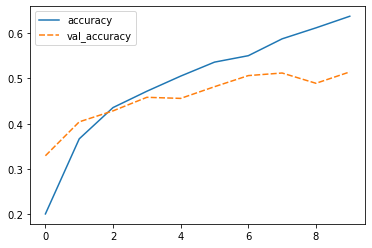

In [26]:
import seaborn as sns
import pandas as pd
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['accuracy', 'val_accuracy']])

<AxesSubplot:>

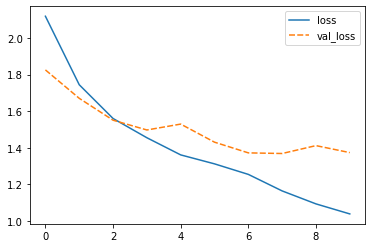

In [27]:
sns.lineplot(data=history_df[['loss', 'val_loss']])